Лабораторна робота №6 ФІТ 4-6 Піць А.В.

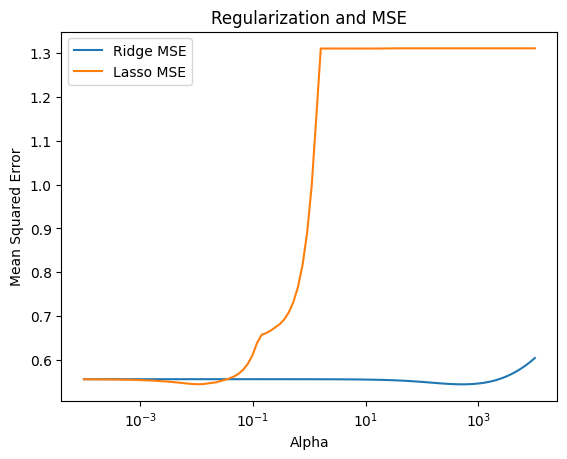

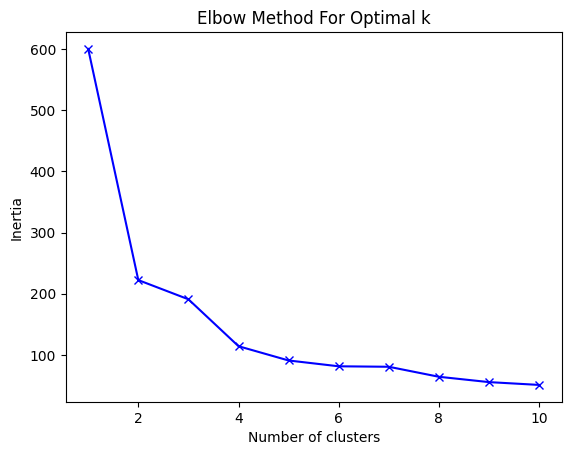

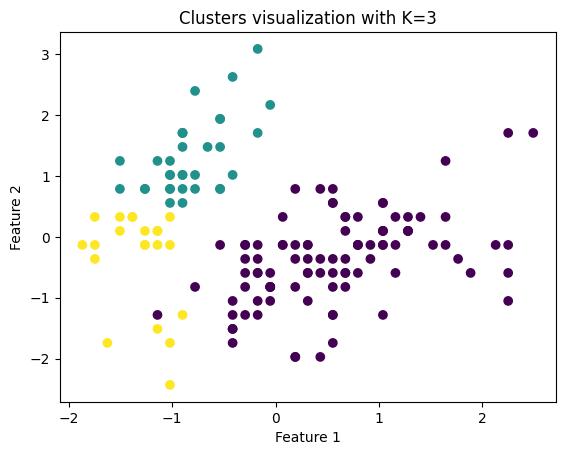

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Завдання 1: Побудова регресійної моделі та запобігання перенавчанню

# 1. Завантажуємо дані
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Побудова лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оцінка моделі
print(f"Linear Regression Train MSE: {mean_squared_error(y_train, y_train_pred)}, R^2: {r2_score(y_train, y_train_pred)}")
print(f"Linear Regression Test MSE: {mean_squared_error(y_test, y_test_pred)}, R^2: {r2_score(y_test, y_test_pred)}")

# 4. Регуляризація (Ridge та Lasso)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_test_pred = ridge.predict(X_test)
print(f"Ridge Regression Test MSE: {mean_squared_error(y_test, ridge_test_pred)}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_test_pred = lasso.predict(X_test)
print(f"Lasso Regression Test MSE: {mean_squared_error(y_test, lasso_test_pred)}")

# 5. Крос-валідація для Ridge та Lasso
ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge CV MSE: {-ridge_cv_scores.mean()}")
print(f"Lasso CV MSE: {-lasso_cv_scores.mean()}")

# 6. Візуалізація залежності помилки від регуляризації
alphas = np.logspace(-4, 4, 100)
ridge_mses = []
lasso_mses = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_mses.append(mean_squared_error(y_test, ridge.predict(X_test)))

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_mses.append(mean_squared_error(y_test, lasso.predict(X_test)))

plt.plot(alphas, ridge_mses, label="Ridge MSE")
plt.plot(alphas, lasso_mses, label="Lasso MSE")
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Regularization and MSE')
plt.legend()
plt.show()


# Завдання 2: Кластеризація даних

# 1. Завантаження даних Iris
iris = load_iris()
X_iris = iris.data

# Масштабування даних
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# 2. Застосування методу ліктя
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_iris_scaled)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 3. Кластеризація з оптимальною кількістю кластерів (3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_iris_scaled)

# 4. Візуалізація кластерів
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Clusters visualization with K={optimal_k}')
plt.show()


Висновок: Регуляризація є важливим інструментом для запобігання перенавчанню в регресійних моделях. Використання моделей Ridge та Lasso дозволило зменшити вплив перенавчання та поліпшити узагальнення на нових даних.
Кластеризація з використанням алгоритму K-Means є ефективним методом для аналізу даних, і метод ліктя допомагає визначити оптимальну кількість кластерів. Візуалізація результатів також дозволяє оцінити якість кластеризації.
Обидва завдання демонструють важливість вибору правильних методів та моделей для ефективного аналізу даних і досягнення кращих результатів.